In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("<entity/project-name>")
            

## Synthetic data
### FedExp v.s. Exp3

In [31]:
synthetic = pd.DataFrame(columns=['_step', 'mean', 'algo'])
for run in runs: 
    if run.config['env'] == 'HalfActBandit-0':
        history = run.scan_history(keys=['_step', 'mean'])
        for row in history:
            if run.config['network'] == 'GRID':
                row['algo'] = 'FedExp3'
            elif run.config['network'] == 'NONE':
                row['algo'] = 'Exp3'
            else:
                continue
            new_pd = pd.DataFrame([row])
            synthetic = pd.concat([synthetic, new_pd], axis=0, ignore_index=True)

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


In [32]:
synthetic

,_step,mean,algo
0,0,0.282407,FedExp3
1,1,0.509259,FedExp3
2,2,0.748457,FedExp3
3,3,0.983796,FedExp3
4,4,1.199846,FedExp3
...,...,...,...
59995,2995,68.971642,Exp3
59996,2996,68.972412,Exp3
59997,2997,68.972412,Exp3
59998,2998,68.972412,Exp3


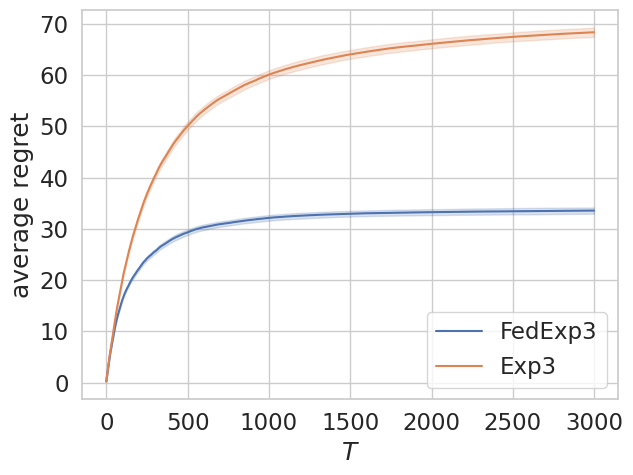

In [33]:
sns.set(style="whitegrid", font_scale=1.5)
ax = sns.lineplot(data=synthetic, x='_step', y='mean', hue='algo', errorbar='sd')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
ax.set(xlabel=r'$T$', ylabel='average regret')
plt.tight_layout(pad=.5)
fig = ax.get_figure()
fig.savefig("regret.png", dpi=300)

### Algebraic connectivity

In [12]:
nets = pd.DataFrame({
    'mixing': [1, 1.106, 1.179, 1.275, 1.515, 1.732, 2.109, 2.652, 3.086],
    'regret': [33.125, 33.035, 33.076, 33.104, 33.19, 33.267, 33.303, 33.576, 33.715],
    'network': ['complete', 'RGG-0.9', 'RGG-0.8', 'RGG-0.7', 'RGG-0.6', 'RGG-0.5', 'RGG-0.4', 'Grid', 'RGG-0.3']
})

In [13]:
nets

,mixing,regret,network
0,1.000,33.125,complete
1,1.106,33.035,RGG-0.9
2,1.179,33.076,RGG-0.8
3,1.275,33.104,RGG-0.7
4,1.515,33.190,RGG-0.6
5,1.732,33.267,RGG-0.5
6,2.109,33.303,RGG-0.4
7,2.652,33.576,Grid
8,3.086,33.715,RGG-0.3


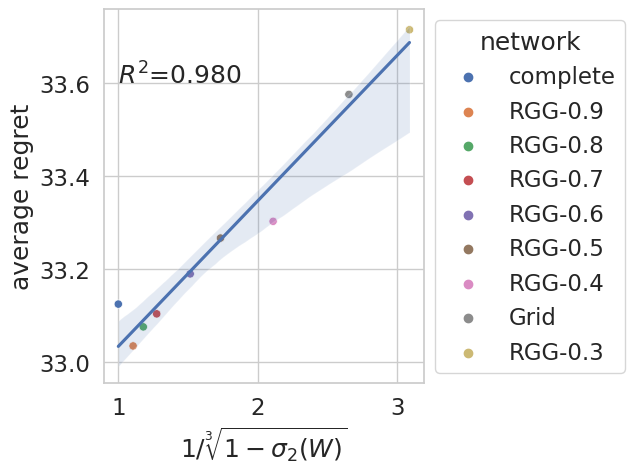

In [44]:
sns.set(style="whitegrid", font_scale=1.5)
ax = sns.scatterplot(data=nets, x='mixing', y='regret', hue='network', legend='brief')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.regplot(data=nets, x='mixing', y='regret', marker='--', ci=95, scatter=False, ax=ax)
ax.set(xlabel=r"$1/\sqrt[3]{1-\sigma_2(W)}$", ylabel=r"average regret")
r, p = sp.stats.pearsonr(nets['mixing'], nets['regret'])
plt.text(1, 33.6, r'$R^2$={:.3f}'.format(r))
plt.tight_layout(pad=.5)
fig = ax.get_figure()
fig.savefig("mixing.png", dpi=300)

## MovieLens

In [45]:
movielens = pd.DataFrame(columns=['_step', 'mean', 'algo'])
for run in runs: 
    if run.config['env'] == 'MovieLens':
        history = run.scan_history(keys=['_step', 'mean'])
        for row in history:
            row['algo'] = run.config['algo']
            row['network'] = run.config['network']
            new_pd = pd.DataFrame([row])
            movielens = pd.concat([movielens, new_pd], axis=0, ignore_index=True)

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


In [47]:
movielens.head()

,_step,mean,algo,network
0,0,0.009028,FedExp3,RGG-0.5-0
1,1,0.018415,FedExp3,RGG-0.5-0
2,2,0.027649,FedExp3,RGG-0.5-0
3,3,0.036901,FedExp3,RGG-0.5-0
4,4,0.045487,FedExp3,RGG-0.5-0


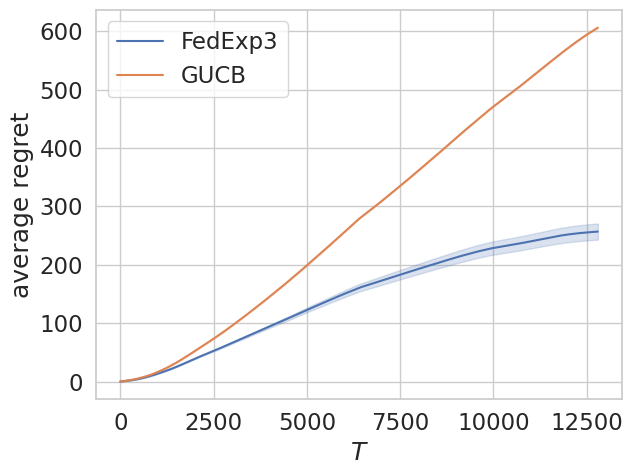

In [50]:
complete = movielens[movielens['network'] == 'COMPLETE']
sns.set(style="whitegrid", font_scale=1.5)
ax = sns.lineplot(data=complete, x='_step', y='mean', hue='algo', errorbar='sd')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
ax.set(xlabel=r'$T$', ylabel='average regret')
plt.tight_layout(pad=.5)
fig = ax.get_figure()
fig.savefig("complete.png", dpi=300)

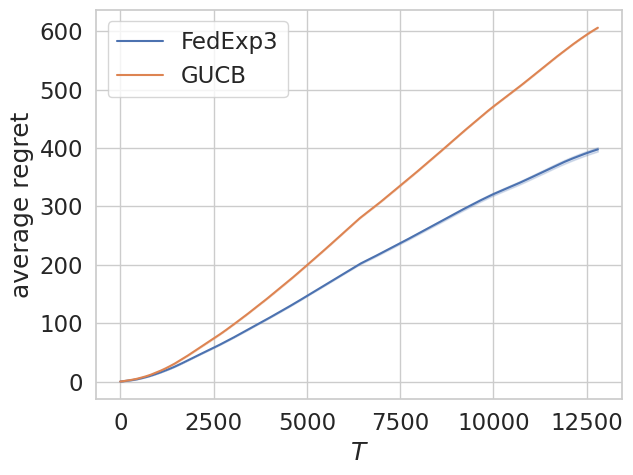

In [51]:
grid = movielens[movielens['network'] == 'GRID']
sns.set(style="whitegrid", font_scale=1.5)
ax = sns.lineplot(data=grid, x='_step', y='mean', hue='algo', errorbar='sd')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
ax.set(xlabel=r'$T$', ylabel='average regret')
plt.tight_layout(pad=.5)
fig = ax.get_figure()
fig.savefig("grid.png", dpi=300)

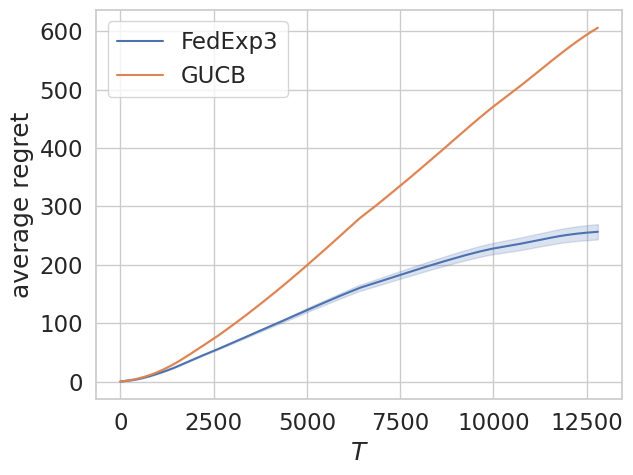

In [52]:
rgg = movielens[movielens['network'] == 'RGG-0.5-0']
sns.set(style="whitegrid", font_scale=1.5)
ax = sns.lineplot(data=rgg, x='_step', y='mean', hue='algo', errorbar='sd')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
ax.set(xlabel=r'$T$', ylabel='average regret')
plt.tight_layout(pad=.5)
fig = ax.get_figure()
fig.savefig("rgg.png", dpi=300)

In [53]:
movielens.to_pickle("movielens.pkl")